In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


pd.options.display.max_columns = 100
pd.options.display.max_rows = 3000
pd.options.display.max_colwidth = 400

In [2]:
df = pd.read_csv('complaints_2018_final.csv')

In [4]:
df2 = pd.read_csv('complaints_2018_wo_income.csv')

#### Clean Up & New Columns

In [5]:
df2.dtypes

cmplnt_num             int64
cmplnt_fr_dt          object
cmplnt_fr_tm          object
cmplnt_to_dt          object
cmplnt_to_tm          object
addr_pct_cd            int64
rpt_dt                object
ky_cd                  int64
ofns_desc             object
pd_cd                  int64
pd_desc               object
crm_atpt_cptd_cd      object
law_cat_cd            object
boro_nm               object
loc_of_occur_desc     object
prem_typ_desc         object
juris_desc            object
jurisdiction_code      int64
parks_nm              object
hadevelopt            object
housing_psa           object
x_coord_cd           float64
y_coord_cd           float64
susp_age_group        object
susp_race             object
susp_sex              object
transit_district     float64
latitude             float64
longitude            float64
lat_lon               object
patrol_boro           object
station_name          object
vic_age_group         object
vic_race              object
vic_sex       

In [6]:
df.dtypes

cmplnt_num                       int64
cmplnt_fr_dt                    object
cmplnt_fr_tm                    object
cmplnt_to_dt                    object
cmplnt_to_tm                    object
addr_pct_cd                    float64
rpt_dt                          object
ky_cd                            int64
ofns_desc                       object
pd_cd                            int64
pd_desc                         object
law_cat_cd                      object
boro_nm                         object
prem_typ_desc                   object
susp_age_group                  object
susp_race                       object
susp_sex                        object
latitude                       float64
longitude                      float64
patrol_boro                     object
vic_age_group                   object
vic_race                        object
vic_sex                         object
neighborhood                    object
population                     float64
area                     

In [7]:
df.shape

(917456, 34)

In [8]:
df2.shape

(75349, 35)

In [9]:
df2['susp_age_group'].value_counts()

UNKNOWN    20236
0          19228
25-44      19170
45-64       7203
18-24       6939
<18         1965
65           608
Name: susp_age_group, dtype: int64

In [10]:
df2 = df2[df2['susp_age_group'] != 'UNKNOWN']

In [11]:
df2 = df2[df2['susp_age_group'] != '0']

In [12]:
df2.shape

(35885, 35)

In [13]:
#zipcodes to object
df['zipcodes'] = df['zipcodes'].astype(str).str.zfill(5)

In [14]:
df['cmplnt_fr_dt']= pd.to_datetime(df['cmplnt_fr_dt'],errors = 'coerce')
df['month'] = df['cmplnt_fr_dt'].dt.strftime('%m')

In [15]:
df['rpt_dt']= pd.to_datetime(df['rpt_dt'],errors = 'coerce')

In [16]:
df = df[df.boro_nm != 'unknown']
df = df[df.patrol_boro != 'unknown']


In [17]:
df.drop(columns=['cmplnt_to_dt', 'cmplnt_to_tm', 'neighborhood','cmplnt_fr_tm','ky_cd','latitude','longitude',
                    'area',"avg_agi","adjusted_gross_income_(agi)",'avg_total_income',"avg_taxable_income","taxable_income_amount"], inplace=True)

In [18]:
df['pd_cd'] = df['pd_cd'].astype(str)
df['addr_pct_cd'] = df['addr_pct_cd'].astype(str)

In [19]:
df = df[df.law_cat_cd != 'violation']

In [20]:
df2 = df2[df2.law_cat_cd != 'violation']

In [21]:
df['law_cat_cd'].value_counts()

misdemeanor    494351
felony         279526
Name: law_cat_cd, dtype: int64

## EDA - column 'law_cat_cd'
### misdemeanor / felony / violation
---

In [22]:
df.law_cat_cd.unique()

array(['misdemeanor', 'felony'], dtype=object)

In [23]:
df['law_cat_cd'].value_counts()

misdemeanor    494351
felony         279526
Name: law_cat_cd, dtype: int64

In [24]:
df2['law_cat_cd'].value_counts()

misdemeanor    19148
felony          9643
Name: law_cat_cd, dtype: int64

Text(0.5, 0, '')

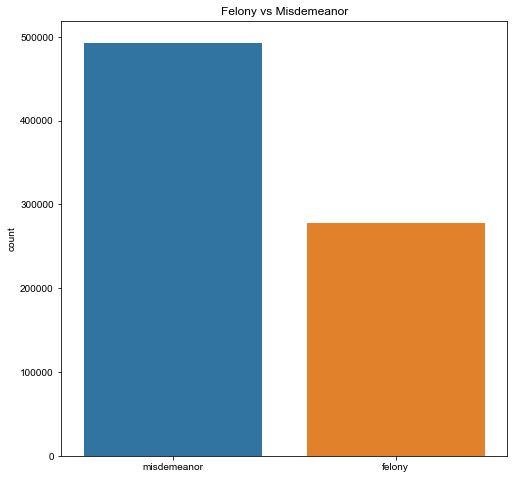

In [25]:

plt.subplots(figsize = (8,8))
sns.set_style(style="darkgrid")

sns.countplot(x='law_cat_cd',data=df).set(title='Felony vs Misdemeanor')
plt.xlabel('')


In [26]:
df.groupby(df.law_cat_cd)

In [27]:
df.groupby(df.law_cat_cd)['month'].describe()

,count,unique,top,freq
law_cat_cd,,,,
felony,279526,12,07,25620
misdemeanor,494351,12,07,45137


In [28]:
df.groupby(df.month)['law_cat_cd'].agg([np.sum])

,sum
month,
01,misdemeanormisdemeanormisdemeanorfelonyfelonymisdemeanormisdemeanormisdemeanormisdemeanormisdemeanormisdemeanorfelonyfelonyfelonymisdemeanormisdemeanormisdemeanormisdemeanormisdemeanorfelonymisdemeanorfelonymisdemeanormisdemeanorfelonymisdemeanorfelonymisdemeanormisdemeanormisdemeanormisdemeanormisdemeanormisdemeanormisdemeanorfelonymisdemeanormisdemeanorfelonymisdemeanormisdemeanorfelonymisde...
02,misdemeanormisdemeanormisdemeanormisdemeanormisdemeanorfelonymisdemeanormisdemeanorfelonyfelonymisdemeanormisdemeanormisdemeanorfelonyfelonymisdemeanormisdemeanormisdemeanormisdemeanorfelonyfelonyfelonymisdemeanormisdemeanorfelonyfelonymisdemeanormisdemeanorfelonymisdemeanormisdemeanormisdemeanormisdemeanormisdemeanormisdemeanormisdemeanormisdemeanormisdemeanormisdemeanorfelonyfelonymisdemeano...
03,misdemeanormisdemeanorfelonyfelonyfelonymisdemeanormisdemeanorfelonymisdemeanormisdemeanormisdemeanorfelonymisdemeanormisdemeanormisdemeanormisdemeanormisdemeanormisdemeanorfelonymisdemeanorfelonyfelonymisdemeanorfelonymisdemeanormisdemeanormisdemeanorfelonymisdemeanorfelonymisdemeanormisdemeanormisdemeanormisdemeanormisdemeanorfelonymisdemeanormisdemeanorfelonyfelonymisdemeanormisdemeanormisd...
04,misdemeanorfelonymisdemeanormisdemeanormisdemeanormisdemeanormisdemeanormisdemeanormisdemeanorfelonyfelonymisdemeanormisdemeanormisdemeanorfelonymisdemeanorfelonymisdemeanorfelonymisdemeanorfelonymisdemeanormisdemeanormisdemeanorfelonymisdemeanorfelonymisdemeanormisdemeanormisdemeanormisdemeanorfelonymisdemeanormisdemeanormisdemeanormisdemeanormisdemeanormisdemeanormisdemeanormisdemeanorfelony...
05,misdemeanormisdemeanormisdemeanormisdemeanormisdemeanorfelonyfelonymisdemeanorfelonyfelonyfelonyfelonyfelonyfelonymisdemeanormisdemeanorfelonymisdemeanorfelonyfelonyfelonyfelonymisdemeanormisdemeanormisdemeanormisdemeanormisdemeanormisdemeanorfelonymisdemeanormisdemeanormisdemeanorfelonymisdemeanormisdemeanormisdemeanormisdemeanormisdemeanormisdemeanormisdemeanorfelonymisdemeanormisdemeanorfel...
06,felonymisdemeanormisdemeanormisdemeanorfelonyfelonymisdemeanormisdemeanormisdemeanorfelonyfelonyfelonymisdemeanormisdemeanorfelonymisdemeanorfelonyfelonyfelonymisdemeanorfelonymisdemeanormisdemeanormisdemeanormisdemeanormisdemeanorfelonymisdemeanormisdemeanormisdemeanormisdemeanorfelonyfelonymisdemeanormisdemeanorfelonymisdemeanorfelonymisdemeanormisdemeanorfelonyfelonymisdemeanormisdemeanormi...
07,felonymisdemeanorfelonymisdemeanormisdemeanorfelonymisdemeanorfelonymisdemeanormisdemeanormisdemeanorfelonymisdemeanormisdemeanorfelonyfelonymisdemeanormisdemeanormisdemeanormisdemeanormisdemeanormisdemeanorfelonymisdemeanorfelonyfelonyfelonymisdemeanormisdemeanormisdemeanorfelonymisdemeanormisdemeanorfelonymisdemeanorfelonymisdemeanorfelonymisdemeanormisdemeanormisdemeanormisdemeanormisdemean...
08,felonymisdemeanorfelonymisdemeanormisdemeanormisdemeanormisdemeanorfelonyfelonyfelonyfelonymisdemeanormisdemeanormisdemeanorfelonymisdemeanormisdemeanormisdemeanormisdemeanormisdemeanormisdemeanormisdemeanormisdemeanormisdemeanormisdemeanormisdemeanormisdemeanormisdemeanorfelonyfelonymisdemeanormisdemeanorfelonymisdemeanormisdemeanormisdemeanormisdemeanormisdemeanormisdemeanormisdemeanorfelony...
09,felonyfelonyfelonyfelonymisdemeanormisdemeanormisdemeanorfelonymisdemeanormisdemeanorfelonyfelonymisdemeanormisdemeanorfelonyfelonymisdemeanorfelonymisdemeanorfelonymisdemeanormisdemeanorfelonymisdemeanormisdemeanorfelonymisdemeanorfelonymisdemeanormisdemeanormisdemeanormisdemeanorfelonyfelonyfelonyfelonyfelonymisdemeanorfelonymisdemeanorfelonymisdemeanormisdemeanormisdemeanormisdemeanorfelony...


In [29]:
df.groupby(df.law_cat_cd)['vic_age_group'].describe()

,count,unique,top,freq
law_cat_cd,,,,
felony,279526,7,2544,97582
misdemeanor,494351,7,unknown,172731


In [30]:
df.groupby(df.law_cat_cd)['susp_age_group'].describe()

,count,unique,top,freq
law_cat_cd,,,,
felony,279526,17,0,83693
misdemeanor,494351,22,0,133770


In [31]:
df.groupby(df.law_cat_cd)['susp_sex'].describe()

,count,unique,top,freq
law_cat_cd,,,,
felony,279526,3,u,134624
misdemeanor,494351,3,m,218013


In [32]:
df.groupby(df.law_cat_cd)['vic_sex'].describe()

,count,unique,top,freq
law_cat_cd,,,,
felony,279526,4,m,107406
misdemeanor,494351,5,f,172983


In [33]:
df.groupby(df.law_cat_cd)['pd_desc'].describe()

,count,unique,top,freq
law_cat_cd,,,,
felony,279526,210,assault_2_1_unclassified,30795
misdemeanor,494351,136,assault_3,85160


In [34]:
df.groupby(df.law_cat_cd)['ofns_desc'].describe()

,count,unique,top,freq
law_cat_cd,,,,
felony,279526,30,grand_larceny,85263
misdemeanor,494351,37,petit_larceny,174667


In [35]:
df.groupby(df.law_cat_cd)['county'].describe()

,count,unique,top,freq
law_cat_cd,,,,
felony,279526,5,Kings,86108
misdemeanor,494351,5,Kings,137582


In [36]:
df.groupby(df.law_cat_cd)['zipcodes'].describe()

,count,unique,top,freq
law_cat_cd,,,,
felony,279526,182,11207.0,5535
misdemeanor,494351,182,10467.0,7757


In [37]:
df.groupby(df.law_cat_cd)['patrol_boro'].describe()

,count,unique,top,freq
law_cat_cd,,,,
felony,279526,8,bronx,55194
misdemeanor,494351,8,bronx,112806


In [38]:
df.groupby(df.law_cat_cd)['prem_typ_desc'].describe()

,count,unique,top,freq
law_cat_cd,,,,
felony,279526,75,street,83866
misdemeanor,494351,75,street,145915


In [39]:
df.groupby(df.law_cat_cd)['total_income_amount'].describe()

,count,mean,std,min,25%,50%,75%,max
law_cat_cd,,,,,,,,
felony,279526.0,1.958329e+06,2.136162e+06,8498.0,885440.0,1189242.0,1948325.0,11877178.0
misdemeanor,494351.0,1.911130e+06,2.082473e+06,8498.0,875934.0,1189242.0,1948325.0,11877178.0


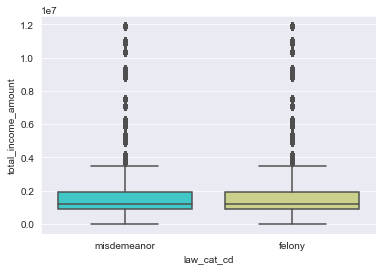

In [40]:
sns.boxplot(x='law_cat_cd',y='total_income_amount',data=df,palette='rainbow')

In [41]:
df.groupby('cmplnt_fr_dt')['law_cat_cd'].count()

cmplnt_fr_dt
2018-01-01    1896
2018-01-02     944
2018-01-03     997
2018-01-04     637
2018-01-05     921
2018-01-06     836
2018-01-07     757
2018-01-08     863
2018-01-09    1006
2018-01-10    1085
2018-01-11    1079
2018-01-12    1131
2018-01-13    1062
2018-01-14     908
2018-01-15     948
2018-01-16    1047
2018-01-17    1007
2018-01-18    1149
2018-01-19    1144
2018-01-20    1091
2018-01-21    1014
2018-01-22    1083
2018-01-23    1102
2018-01-24    1126
2018-01-25    1048
2018-01-26    1256
2018-01-27    1101
2018-01-28    1004
2018-01-29    1001
2018-01-30    1027
2018-01-31    1032
2018-02-01    1282
2018-02-02    1087
2018-02-03    1058
2018-02-04     960
2018-02-05    1026
2018-02-06    1010
2018-02-07    1008
2018-02-08    1052
2018-02-09    1088
2018-02-10    1010
2018-02-11     953
2018-02-12    1036
2018-02-13    1018
2018-02-14    1116
2018-02-15    1223
2018-02-16    1061
2018-02-17    1011
2018-02-18     910
2018-02-19     954
2018-02-20    1089
2018-02-21    1168

In [42]:
#https://colab.research.google.com/drive/1Z0wRWAYBguHMppOrQNe0SIURfiVPUOD0#scrollTo=Bu_pErL73gXb
boro_cries = df.groupby(['boro_nm']).agg({'cmplnt_num':'count'})
top_crimes = boro_cries.sort_values('cmplnt_num', ascending=False)
top_crimes.head()

,cmplnt_num
boro_nm,
brooklyn,223891
manhattan,198500
bronx,168006
queens,152349
staten_island,31131


In [43]:
top_crimes_prop = top_crimes.assign(propotion = top_crimes.cmplnt_num / sum(top_crimes.cmplnt_num))

top_crimes_prop = top_crimes_prop.reset_index()

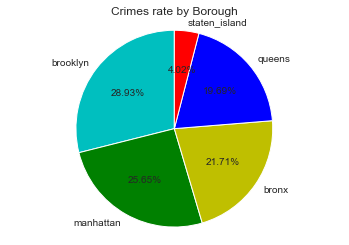

In [44]:
x = top_crimes_prop['boro_nm']
y = top_crimes_prop['propotion']
colors = ['c', 'g', 'y', 'b', 'r']

plt.pie(top_crimes_prop['propotion'], labels=top_crimes_prop['boro_nm'], colors=colors,
        startangle=90,
        explode = (0, 0, 0,0 ,0),
        autopct = '%1.2f%%')
plt.axis('equal')
plt.title('Crimes rate by Borough')
plt.show()

In [45]:
neighborhood = df.boro_nm.unique()
neighborhood.sort()

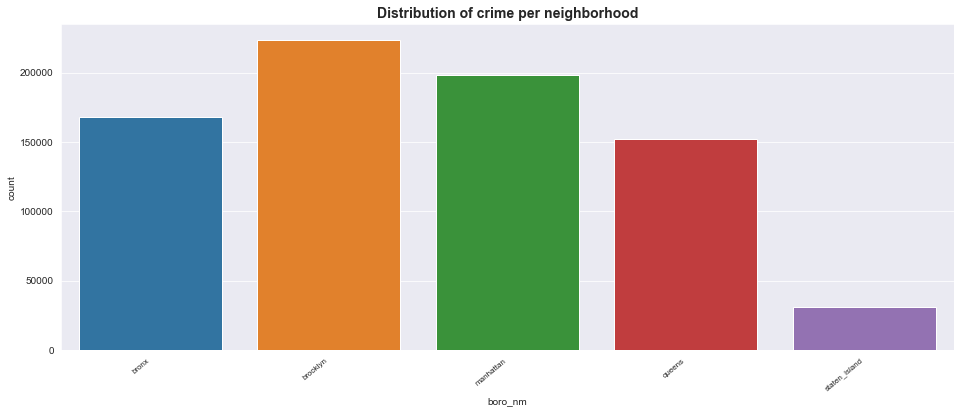

In [46]:
plt.figure(figsize=(16,6))
ax = sns.countplot(x='boro_nm', data=df, order=neighborhood)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=8)
plt.title('Distribution of crime per neighborhood', fontsize=14, fontweight='bold')
plt.show()

In [47]:
zipcodes = df.zipcodes.unique()
zipcodes.sort()

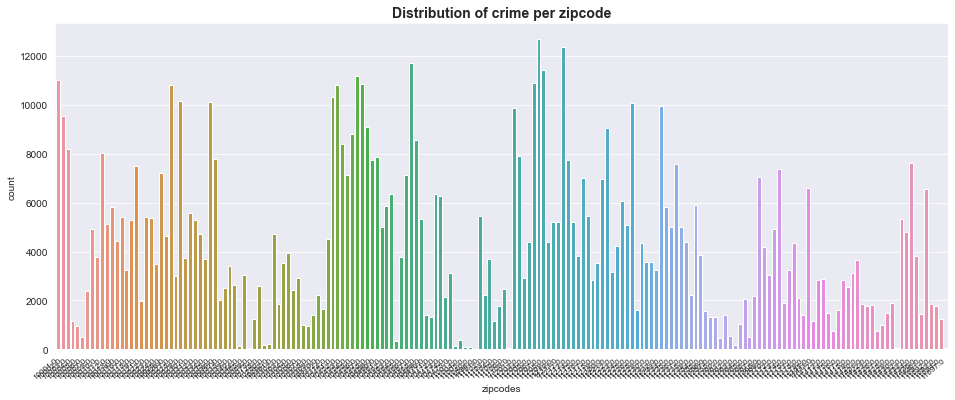

In [48]:
plt.figure(figsize=(16,6))
ax = sns.countplot(x='zipcodes', data=df, order=zipcodes)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=8)
plt.title('Distribution of crime per zipcode', fontsize=14, fontweight='bold')
plt.show()

## EDA - column 'ofns_desc'
### Offense Description 
---

In [49]:
zipcodes = df.zipcodes.unique()
zipcodes.sort()

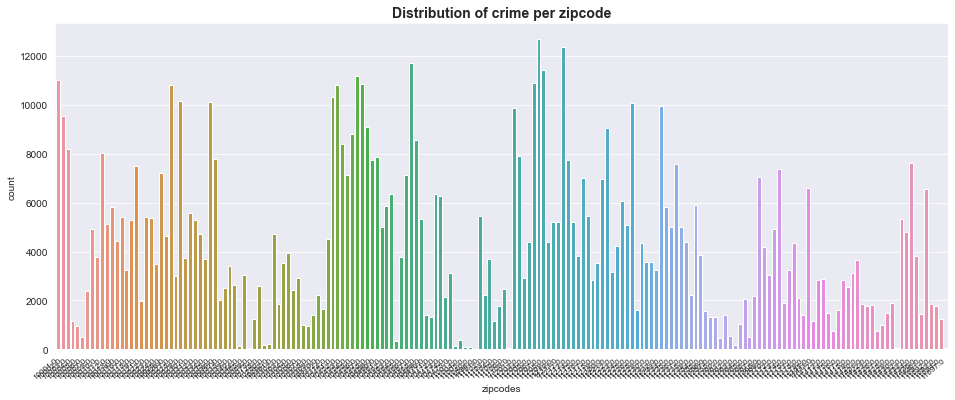

In [50]:
plt.figure(figsize=(16,6))
ax = sns.countplot(x='zipcodes', data=df, order=zipcodes)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=8)
plt.title('Distribution of crime per zipcode', fontsize=14, fontweight='bold')
plt.show()

In [51]:
df.ofns_desc.value_counts() / len(df)

petit_larceny                          0.225704
assault_3_&_related_offenses           0.136480
criminal_mischief_&_related_of         0.121460
grand_larceny                          0.110176
felony_assault                         0.052672
off_agnst_pub_ord_sensblty_&           0.051460
dangerous_drugs                        0.036881
miscellaneous_penal_law                0.033986
robbery                                0.033790
burglary                               0.028914
offenses_against_public_admini         0.019596
dangerous_weapons                      0.018268
sex_crimes                             0.017438
vehicle_and_traffic_laws               0.017282
grand_larceny_of_motor_vehicle         0.013962
forgery                                0.012802
intoxicated_&_impaired_driving         0.012001
theft_fraud                            0.009813
criminal_trespass                      0.008124
frauds                                 0.006036
unauthorized_use_of_a_vehicle          0

In [52]:
crimes = df.ofns_desc.unique()
crimes.sort()

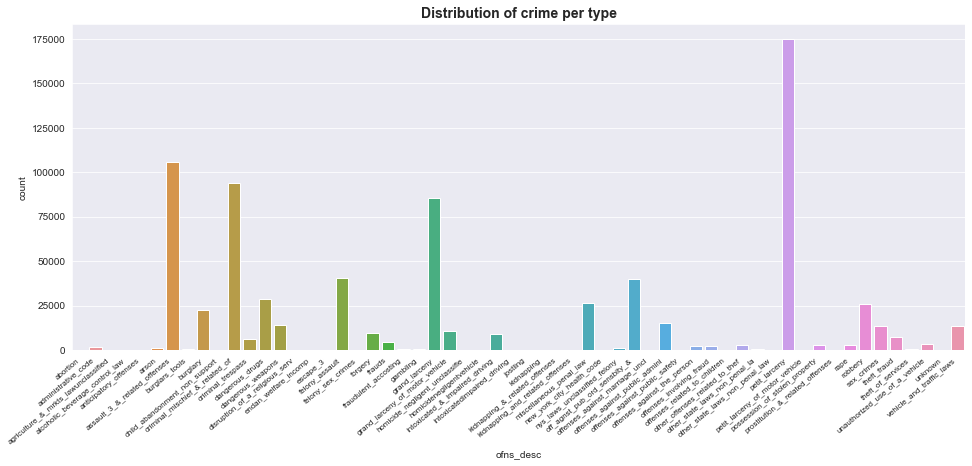

In [53]:
plt.figure(figsize=(16,6))
ax = sns.countplot(x='ofns_desc', data=df, order=crimes)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=8)
plt.title('Distribution of crime per type', fontsize=14, fontweight='bold')
plt.show()

In [54]:
df.groupby(by=['ofns_desc','boro_nm']).describe()

cmplnt_num                \
                                                       count          mean   
ofns_desc                           boro_nm                                  
abortion                            bronx                1.0  7.218313e+08   
administrative_code                 bronx              653.0  5.413972e+08   
                                    brooklyn           559.0  5.406543e+08   
                                    manhattan          252.0  5.699864e+08   
                                    queens             472.0  5.279494e+08   
                                    staten_island       73.0  5.783678e+08   
agriculture_&_mrkts_lawunclassified bronx               70.0  5.476249e+08   
                                    brooklyn            68.0  6.257710e+08   
                                    manhattan           57.0  5.885287e+08   
                                    queens              55.0  5.507925e+08   
                                    staten_island       20.0  5.380305e+08   
alcoholic_beverage_control_law      bronx               51.0  6.022089e+08   
                                    brooklyn           130.0  5.386618e+08   
                                    manhattan           16.0  5.577397e+08   
                                    queens              18.0  4.903005e+08   
                                    staten_island        1.0  4.983694e+08   
anticipatory_offenses               bronx                2.0  3.667005e+08   
                                    brooklyn             3.0  7.531982e+08   
                                    manhattan            4.0  2.934425e+08   
                                    queens               3.0  4.432737e+08   
arson                               bronx              425.0  5.601104e+08   
                                    brooklyn           418.0  5.319456e+08   
                                    manhattan          252.0  5.614834e+08   
                                    queens             275.0  5.410647e+08   
                                    staten_island       57.0  4.881306e+08   
assault_3_&_related_offenses        bronx            28514.0  5.515733e+08   
                                    brooklyn         29217.0  5.513065e+08   
                                    manhattan        22046.0  5.497491e+08   
                                    queens           21650.0  5.474456e+08   
                                    staten_island     4192.0  5.531805e+08   
burglars_tools                      bronx               61.0  5.306941e+08   
                                    brooklyn           199.0  5.609661e+08   
                                    manhattan          248.0  5.308525e+08   
                                    queens             107.0  5.703853e+08   
                                    staten_island       10.0  4.713012e+08   
burglary                            bronx             4285.0  5.555627e+08   
                                    brooklyn          7476.0  5.510033e+08   
                                    manhattan         5070.0  5.564495e+08   
                                    queens            4900.0  5.512672e+08   
                                    staten_island      645.0  5.672539e+08   
child_abandonment_non_support       bronx               16.0  4.649815e+08   
                                    brooklyn             8.0  6.373234e+08   
                                    manhattan            7.0  4.658994e+08   
                                    queens               4.0  2.938639e+08   
                                    staten_island        2.0  4.398227e+08   
criminal_mischief_&_related_of      bronx            21993.0  5.516020e+08   
                                    brooklyn         28033.0  5.499620e+08   
                                    manhattan        18651.0  5.488122e+08   
                                    queens           20339.0  5.546314e+

In [55]:
neighbors_II = df.groupby(by=['ofns_desc','boro_nm']).boro_nm.value_counts().sort_index()

In [56]:
df2.head()

,cmplnt_num,cmplnt_fr_dt,cmplnt_fr_tm,cmplnt_to_dt,cmplnt_to_tm,addr_pct_cd,rpt_dt,ky_cd,ofns_desc,pd_cd,pd_desc,crm_atpt_cptd_cd,law_cat_cd,boro_nm,loc_of_occur_desc,prem_typ_desc,juris_desc,jurisdiction_code,parks_nm,hadevelopt,housing_psa,x_coord_cd,y_coord_cd,susp_age_group,susp_race,susp_sex,transit_district,latitude,longitude,lat_lon,patrol_boro,station_name,vic_age_group,vic_race,vic_sex
6,871449938,2018-12-15,02:10 AM,0,0,14,2019-03-13,101,murder_&_nonnegl_manslaughter,0,NaN,COMPLETED,felony,unknown,INSIDE,unknown,N.Y. POLICE DEPT,0,0,0,0,0.0,0.0,25-44,black,f,0.0,0.0,0.0,0,unknown,0,UNKNOWN,black,m
9,995833483,2018-07-06,15:00 PM,07/15/2018,19:00:00,45,2019-03-18,116,sex_crimes,594,obscenity_1,COMPLETED,felony,bronx,INSIDE,residence_apt_house,N.Y. POLICE DEPT,0,0,0,0,0.0,0.0,18-24,white_hispanic,m,0.0,0.0,0.0,0,bronx,0,<18,white_hispanic,f
14,324070938,2018-08-15,06:00 AM,08/15/2018,08:00:00,63,2019-02-08,104,rape,157,rape_1,COMPLETED,felony,brooklyn,INSIDE,residence_apt_house,N.Y. POLICE DEPT,0,0,0,0,0.0,0.0,45-64,black,m,0.0,0.0,0.0,0,bklyn_south,0,25-44,black,f
17,756676260,2018-11-29,12:00 PM,0,0,24,2019-01-24,109,grand_larceny,439,larceny_grand_from_open_areas_unattended,COMPLETED,felony,manhattan,INSIDE,mailbox_outside,N.Y. POLICE DEPT,0,0,0,0,0.0,0.0,18-24,black,m,0.0,0.0,0.0,0,man_north,0,UNKNOWN,unknown,f
29,172355213,2018-12-18,15:00 PM,0,0,44,2019-01-03,361,off_agnst_pub_ord_sensblty_&,639,aggravated_harassment_2,COMPLETED,misdemeanor,bronx,INSIDE,residence_apt_house,N.Y. POLICE DEPT,0,0,0,0,0.0,0.0,25-44,black_hispanic,m,0.0,0.0,0.0,0,bronx,0,25-44,white_hispanic,f


In [57]:
sus_age_sum = df2.groupby(by=['ofns_desc','susp_age_group']).sum()
sus_age_mean = df2.groupby(by=['ofns_desc','susp_age_group']).mean()

In [58]:
df2.groupby(by=['ofns_desc','susp_age_group']).sum()
df2.groupby(by=['susp_sex','susp_age_group']).sum()

cmplnt_num  addr_pct_cd    ky_cd    pd_cd  \
susp_sex susp_age_group                                                 
f        18-24            703030981712        78395   359348   421699   
         25-44           1730183011345       198275   887378  1114877   
         45-64            573577501589        65279   296459   359375   
         65                37459141608         4511    21178    22737   
         <18              232778745136        26507   122161   108314   
m        18-24           2564672183103       287435  1120847  1739747   
         25-44           6648732745528       738318  3076483  4438179   
         45-64           2363125537358       259293  1114379  1613184   
         65               146417392159        18303    75530    98901   
         <18              623872787968        73608   278325   367446   
u        18-24             49609273236         6651    20194    31626   
         25-44            138466917593        14221    61990    79225   
         45-64             30111124995         3077    15736    20356   
         65                 3578586678          341     1867     2568   
         <18               18100710444         2537     9167    10184   

                         jurisdiction_code    x_coord_cd    y_coord_cd  \
susp_sex susp_age_group                                                  
f        18-24                        2445  1.278391e+09  2.662028e+08   
         25-44                        5042  3.160266e+09  6.596570e+08   
         45-64                        2109  1.015439e+09  2.115716e+08   
         65                            274  6.911349e+07  1.421638e+07   
         <18                           438  4.165653e+08  8.699441e+07   
m        18-24                        6707  4.517672e+09  9.377394e+08   
         25-44                       14016  1.188496e+10  2.472270e+09   
         45-64                        7731  4.213984e+09  8.742418e+08   
         65                            922  2.889006e+08  5.961160e+07   
         <18                           879  1.101766e+09  2.268728e+08   
u        18-24                          16  9.856132e+07  1.981124e+07   
         25-44                         126  2.432296e+08  5.084778e+07   
         45-64                           1  5.617631e+07  1.149393e+07   
         65                              0  5.992643e+06  1.255871e+06   
         <18                             3  3.725966e+07  7.580160e+06   

                         transit_district       latitude      longitude  
susp_sex susp_age_group                                                  
f        18-24                      154.0   51782.454158  -93955.056479  
         25-44                      423.0  128054.334330 -232340.949655  
         45-64                       68.0   41189.180484  -74740.482157  
         65                           0.0    2810.518140   -5101.665332  
         <18                        271.0   16867.765408  -30603.198992  
m        18-24                     3196.0  182962.233832 -331982.384023  
         25-44                     4961.0  481716.118383 -874083.685685  
         45-64                     1559.0  170858.459550 -310045.415489  
         65                          43.0   11691.443664  -21214.824835  
         <18                        445.0   44645.341674  -81020.865761  
u        18-24                      164.0    3990.707529   -7244.404661  
         25-44                      262.0    9859.892360  -17889.805696  
         45-64                       11.0    2280.880511   -4140.181060  
         65                           0.0     244.447081    -443.685525  
         <18                         33.0    1506.971071   -2734.960526

In [59]:
#exporting to review in Xcel
#df2.to_csv('complaints_2018_df2.csv', index = False)

In [60]:
df2.head()

,cmplnt_num,cmplnt_fr_dt,cmplnt_fr_tm,cmplnt_to_dt,cmplnt_to_tm,addr_pct_cd,rpt_dt,ky_cd,ofns_desc,pd_cd,pd_desc,crm_atpt_cptd_cd,law_cat_cd,boro_nm,loc_of_occur_desc,prem_typ_desc,juris_desc,jurisdiction_code,parks_nm,hadevelopt,housing_psa,x_coord_cd,y_coord_cd,susp_age_group,susp_race,susp_sex,transit_district,latitude,longitude,lat_lon,patrol_boro,station_name,vic_age_group,vic_race,vic_sex
6,871449938,2018-12-15,02:10 AM,0,0,14,2019-03-13,101,murder_&_nonnegl_manslaughter,0,NaN,COMPLETED,felony,unknown,INSIDE,unknown,N.Y. POLICE DEPT,0,0,0,0,0.0,0.0,25-44,black,f,0.0,0.0,0.0,0,unknown,0,UNKNOWN,black,m
9,995833483,2018-07-06,15:00 PM,07/15/2018,19:00:00,45,2019-03-18,116,sex_crimes,594,obscenity_1,COMPLETED,felony,bronx,INSIDE,residence_apt_house,N.Y. POLICE DEPT,0,0,0,0,0.0,0.0,18-24,white_hispanic,m,0.0,0.0,0.0,0,bronx,0,<18,white_hispanic,f
14,324070938,2018-08-15,06:00 AM,08/15/2018,08:00:00,63,2019-02-08,104,rape,157,rape_1,COMPLETED,felony,brooklyn,INSIDE,residence_apt_house,N.Y. POLICE DEPT,0,0,0,0,0.0,0.0,45-64,black,m,0.0,0.0,0.0,0,bklyn_south,0,25-44,black,f
17,756676260,2018-11-29,12:00 PM,0,0,24,2019-01-24,109,grand_larceny,439,larceny_grand_from_open_areas_unattended,COMPLETED,felony,manhattan,INSIDE,mailbox_outside,N.Y. POLICE DEPT,0,0,0,0,0.0,0.0,18-24,black,m,0.0,0.0,0.0,0,man_north,0,UNKNOWN,unknown,f
29,172355213,2018-12-18,15:00 PM,0,0,44,2019-01-03,361,off_agnst_pub_ord_sensblty_&,639,aggravated_harassment_2,COMPLETED,misdemeanor,bronx,INSIDE,residence_apt_house,N.Y. POLICE DEPT,0,0,0,0,0.0,0.0,25-44,black_hispanic,m,0.0,0.0,0.0,0,bronx,0,25-44,white_hispanic,f


In [61]:
df['susp_age_group'].value_counts()

0          217463
unknown    213131
2544       187161
1824        67992
4564        64397
<18         19101
65+          4599
2019            8
966             2
929             2
1               2
1012            1
973             1
978             1
964             1
928             1
64              1
947             1
2               1
63              1
968             1
974             1
965             1
948             1
939             1
941             1
922             1
938             1
80              1
930             1
Name: susp_age_group, dtype: int64

In [62]:
df['susp_age_group'] = df['susp_age_group'].replace('936','0')

In [63]:
df['susp_sex'].value_counts()

u    344747
m    340199
f     88931
Name: susp_sex, dtype: int64

In [64]:
# Top 10 Violent Crimes:
# 1. assault_3_&_related_offenses 
# 2. felony_assault
# 3. robbery
# 4. sex_crimes, felony_sex_crimes
# 5. rape

# Top 10 Non Violent Crimes:
# 1. petit_larceny  
# 2. criminal_mischief_&_related_of
# 3. grand_larceny
# 4. off_agnst_pub_ord_sensblty_&
# 5. dangerous_drugs
# 6. miscellaneous_penal_law
# 7. burglary
# 8. offenses_against_public_admini
# 9. dangerous_weapons
# 10. vehicle_and_traffic_laws

# Crime that could improve with programs
# 1. dangerous_drugs
# 2.assault_3_&_related_offenses, felony_assault
# 3. sex_crimes, felony_sex_crimes, rape
# 4. alcohol related

In [65]:
crime_dictionary ={'assault_3_&_related_offenses':'violent','felony_assault':'violent','robbery':'violent',
                       'sex_crimes':'violent','felony_sex_crimes':'violent','rape':'violent',
                       'petit_larceny':'non_violent','criminal_mischief_&_related_of':'non_violent',
                       'grand_larceny':'non_violent','dangerous_drugs':'non_violent','burglary':'non_violent',
                       'dangerous_weapons':'non_violent'}
  

df['violent_non'] = df['ofns_desc'].map(crime_dictionary)

In [66]:
df['violent_non'].value_counts()

non_violent    418979
violent        189021
Name: violent_non, dtype: int64

In [67]:
df['violent_non'].isnull().sum()

165877

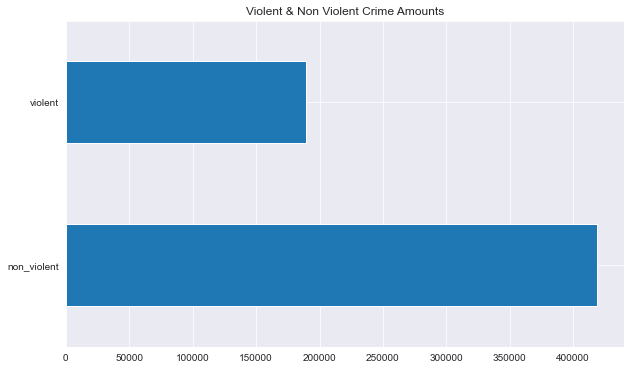

In [68]:
fig, ax = plt.subplots(figsize=(10, 6))

df.violent_non.value_counts().iloc[:10].plot(kind= "barh", title="Violent & Non Violent Crime Amounts");

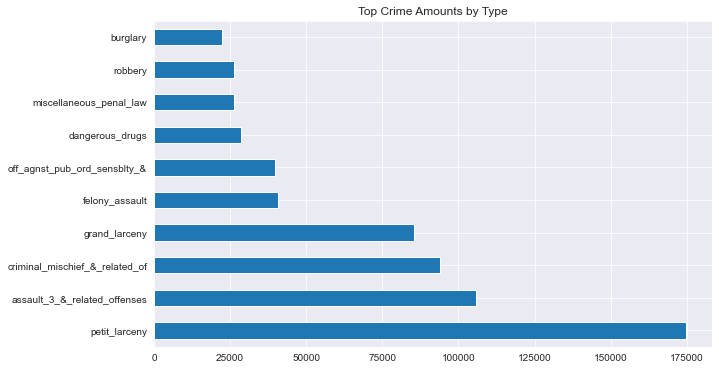

In [69]:
fig, ax = plt.subplots(figsize=(10, 6))

df.ofns_desc.value_counts().iloc[:10].plot(kind= "barh", title="Top Crime Amounts by Type");

In [70]:
broken_down_complaints = df.groupby(['ofns_desc', 'boro_nm']).cmplnt_num.count()

In [71]:
df.ofns_desc.value_counts()[:20]

petit_larceny                     174667
assault_3_&_related_offenses      105619
criminal_mischief_&_related_of     93995
grand_larceny                      85263
felony_assault                     40762
off_agnst_pub_ord_sensblty_&       39824
dangerous_drugs                    28541
miscellaneous_penal_law            26301
robbery                            26149
burglary                           22376
offenses_against_public_admini     15165
dangerous_weapons                  14137
sex_crimes                         13495
vehicle_and_traffic_laws           13374
grand_larceny_of_motor_vehicle     10805
forgery                             9907
intoxicated_&_impaired_driving      9287
theft_fraud                         7594
criminal_trespass                   6287
frauds                              4671
Name: ofns_desc, dtype: int64

In [72]:
df3 = df[df['ofns_desc'].map(df['ofns_desc'].value_counts()) > 4671]

In [73]:
df3.head()

,cmplnt_num,cmplnt_fr_dt,addr_pct_cd,rpt_dt,ofns_desc,pd_cd,pd_desc,law_cat_cd,boro_nm,prem_typ_desc,susp_age_group,susp_race,susp_sex,patrol_boro,vic_age_group,vic_race,vic_sex,population,county,zipcodes,total_income_amount,month,violent_non
0,453608592,2018-12-21,7.0,2019-01-02,petit_larceny,338,larceny_petit_from_building_un,misdemeanor,manhattan,public_school,0,unknown,u,man_south,unknown,unknown,d,81305.0,New York,10002.0,2033619.0,12,non_violent
1,878647334,2018-10-17,104.0,2019-01-15,petit_larceny,349,larceny_petit_of_license_plate,misdemeanor,queens,street,0,unknown,u,queens_north,2544,white_hispanic,f,98436.0,Queens,11385.0,1948325.0,10,non_violent
2,128026914,2018-12-24,45.0,2019-01-02,petit_larceny,349,larceny_petit_of_license_plate,misdemeanor,bronx,street,0,unknown,u,bronx,4564,white,f,4438.0,Bronx,10464.0,165381.0,12,non_violent
3,997752766,2018-09-17,62.0,2019-01-07,theft_fraud,739,fraud_unclassified_felony,felony,brooklyn,residence_house,0,unknown,u,bklyn_south,unknown,unknown,f,77354.0,Kings,11204.0,1629709.0,09,NaN
4,746011851,2018-09-04,52.0,2019-12-09,sex_crimes,168,sodomy_1,felony,bronx,residence_apt_house,unknown,unknown,m,bronx,<18,white_hispanic,f,97932.0,Bronx,10467.0,1368864.0,09,violent


In [74]:
broken_down_complaints = df3.groupby(['ofns_desc', 'boro_nm']).cmplnt_num.count()

In [75]:
complaints_df = broken_down_complaints.unstack()

complaints_df

boro_nm,bronx,brooklyn,manhattan,queens,staten_island
ofns_desc,,,,,
assault_3_&_related_offenses,28514,29217,22046,21650,4192
burglary,4285,7476,5070,4900,645
criminal_mischief_&_related_of,21993,28033,18651,20339,4979
criminal_trespass,991,1871,1566,1551,308
dangerous_drugs,9918,7728,7563,2373,959
dangerous_weapons,3678,4775,2705,2443,536
felony_assault,11718,12129,7698,8002,1215
forgery,1672,3782,2524,1727,202
grand_larceny,12661,22058,32392,15957,2195


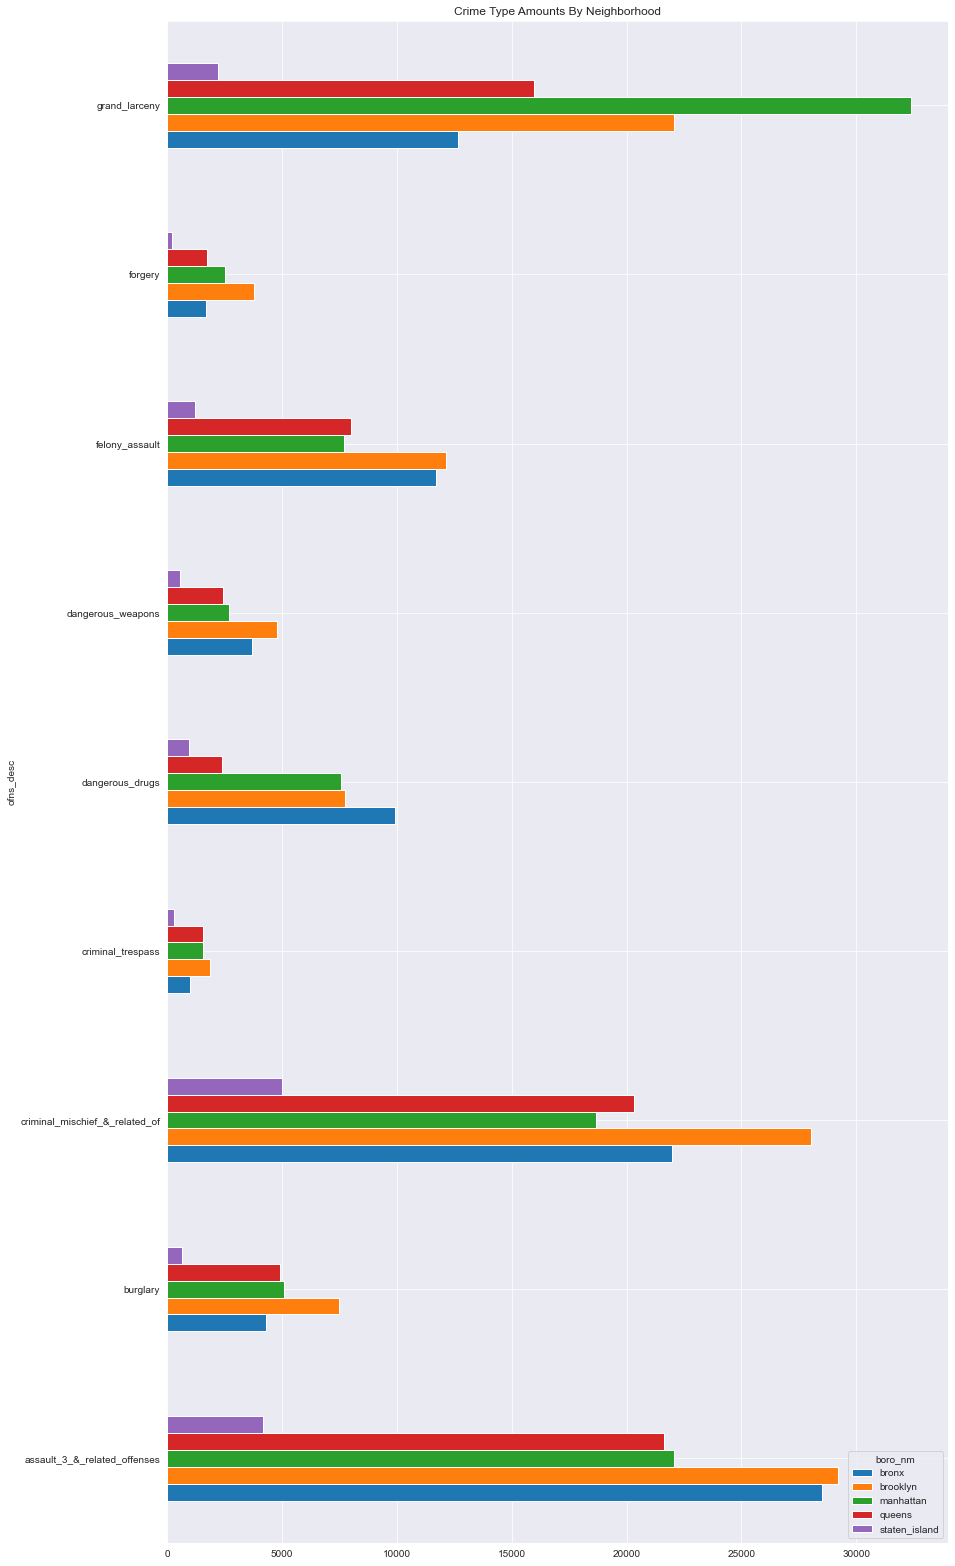

In [76]:
complaints_df[:len(complaints_df) // 2].plot.barh(figsize = (14,28), title = "Crime Type Amounts By Neighborhood");


In [77]:
#plot styler
#forgot to get source for this
from matplotlib import cycler
colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

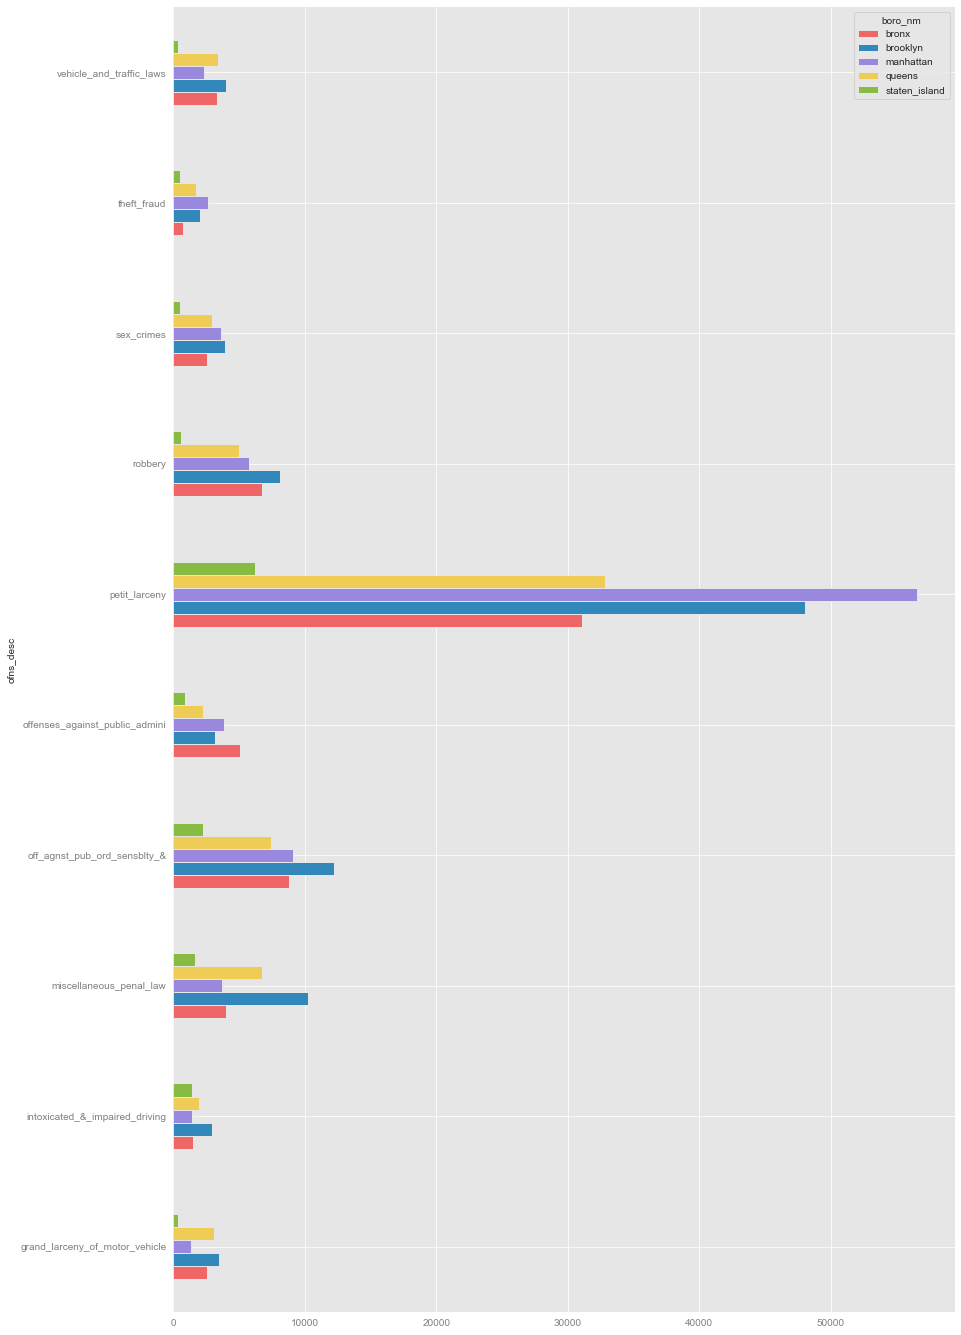

In [78]:
complaints_df[len(complaints_df) // 2:].plot.barh(figsize = (14,24), rot = 0);

#### non-violent crimes

In [79]:
df4 = df.dropna(subset= ['violent_non']) 

In [80]:
nonviolent = df4[df4.violent_non.str.contains("non_violent")]
nonviolent.head()

,cmplnt_num,cmplnt_fr_dt,addr_pct_cd,rpt_dt,ofns_desc,pd_cd,pd_desc,law_cat_cd,boro_nm,prem_typ_desc,susp_age_group,susp_race,susp_sex,patrol_boro,vic_age_group,vic_race,vic_sex,population,county,zipcodes,total_income_amount,month,violent_non
0,453608592,2018-12-21,7.0,2019-01-02,petit_larceny,338,larceny_petit_from_building_un,misdemeanor,manhattan,public_school,0,unknown,u,man_south,unknown,unknown,d,81305.0,New York,10002.0,2033619.0,12,non_violent
1,878647334,2018-10-17,104.0,2019-01-15,petit_larceny,349,larceny_petit_of_license_plate,misdemeanor,queens,street,0,unknown,u,queens_north,2544,white_hispanic,f,98436.0,Queens,11385.0,1948325.0,10,non_violent
2,128026914,2018-12-24,45.0,2019-01-02,petit_larceny,349,larceny_petit_of_license_plate,misdemeanor,bronx,street,0,unknown,u,bronx,4564,white,f,4438.0,Bronx,10464.0,165381.0,12,non_violent
9,412016658,2018-11-20,77.0,2019-02-09,petit_larceny,343,larceny_petit_of_bicycle,misdemeanor,brooklyn,residence_apt_house,0,unknown,u,bklyn_north,2544,white,f,46664.0,Kings,11238.0,2102096.0,11,non_violent
10,762939078,2018-12-20,79.0,2019-02-06,grand_larceny,418,larceny_grand_by_acquiring_lost_credit_card,felony,brooklyn,residence_house,0,unknown,u,bklyn_north,2544,unknown,m,53862.0,Kings,11216.0,1112530.0,12,non_violent


In [81]:
nonviolent.groupby('boro_nm').size().sort_values(ascending = False)

boro_nm
manhattan        122948
brooklyn         118105
bronx             83572
queens            78841
staten_island     15513
dtype: int64

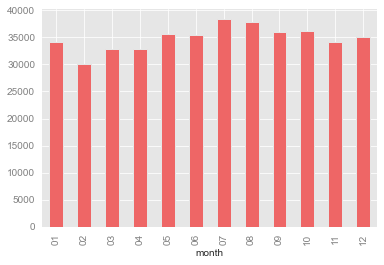

In [82]:
nonviolent.groupby("month").size().plot(kind = "bar")

#### Violent Crimes

In [83]:
violent = df4[df4.violent_non.str.contains("violent")]
violent.head()

,cmplnt_num,cmplnt_fr_dt,addr_pct_cd,rpt_dt,ofns_desc,pd_cd,pd_desc,law_cat_cd,boro_nm,prem_typ_desc,susp_age_group,susp_race,susp_sex,patrol_boro,vic_age_group,vic_race,vic_sex,population,county,zipcodes,total_income_amount,month,violent_non
0,453608592,2018-12-21,7.0,2019-01-02,petit_larceny,338,larceny_petit_from_building_un,misdemeanor,manhattan,public_school,0,unknown,u,man_south,unknown,unknown,d,81305.0,New York,10002.0,2033619.0,12,non_violent
1,878647334,2018-10-17,104.0,2019-01-15,petit_larceny,349,larceny_petit_of_license_plate,misdemeanor,queens,street,0,unknown,u,queens_north,2544,white_hispanic,f,98436.0,Queens,11385.0,1948325.0,10,non_violent
2,128026914,2018-12-24,45.0,2019-01-02,petit_larceny,349,larceny_petit_of_license_plate,misdemeanor,bronx,street,0,unknown,u,bronx,4564,white,f,4438.0,Bronx,10464.0,165381.0,12,non_violent
4,746011851,2018-09-04,52.0,2019-12-09,sex_crimes,168,sodomy_1,felony,bronx,residence_apt_house,unknown,unknown,m,bronx,<18,white_hispanic,f,97932.0,Bronx,10467.0,1368864.0,09,violent
6,328344212,2018-10-31,90.0,2018-10-31,felony_assault,109,assault_2_1_unclassified,felony,brooklyn,street,2544,black,m,bklyn_north,2544,white,m,83575.0,Kings,11206.0,1162178.0,10,violent


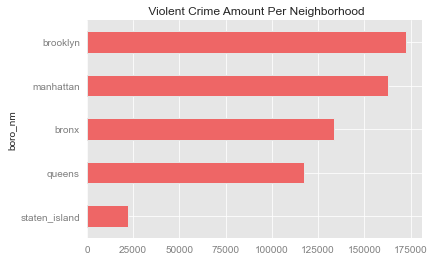

In [84]:
violent.groupby('boro_nm').size().sort_values(ascending = False).head(10).sort_values().plot(kind= "barh", title=" Violent Crime Amount Per Neighborhood")

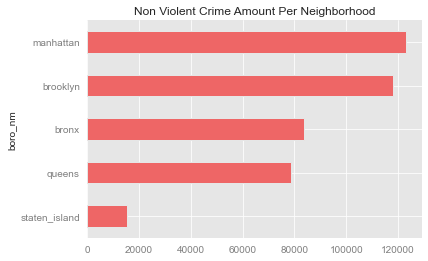

In [85]:
nonviolent.groupby('boro_nm').size().sort_values(ascending = False).head(10).sort_values().plot(kind= "barh", title="Non Violent Crime Amount Per Neighborhood");

In [86]:
violent.groupby('boro_nm').size().sort_values(ascending = False)

boro_nm
brooklyn         172418
manhattan        162648
bronx            133760
queens           117114
staten_island     22060
dtype: int64

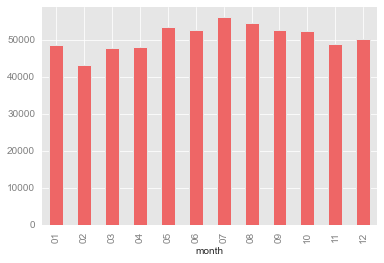

In [87]:
violent.groupby("month").size().plot(kind = "bar")

#### Larceny

In [88]:
larceny = df[df.ofns_desc.str.contains("larceny")]
larceny.head()

,cmplnt_num,cmplnt_fr_dt,addr_pct_cd,rpt_dt,ofns_desc,pd_cd,pd_desc,law_cat_cd,boro_nm,prem_typ_desc,susp_age_group,susp_race,susp_sex,patrol_boro,vic_age_group,vic_race,vic_sex,population,county,zipcodes,total_income_amount,month,violent_non
0,453608592,2018-12-21,7.0,2019-01-02,petit_larceny,338,larceny_petit_from_building_un,misdemeanor,manhattan,public_school,0,unknown,u,man_south,unknown,unknown,d,81305.0,New York,10002.0,2033619.0,12,non_violent
1,878647334,2018-10-17,104.0,2019-01-15,petit_larceny,349,larceny_petit_of_license_plate,misdemeanor,queens,street,0,unknown,u,queens_north,2544,white_hispanic,f,98436.0,Queens,11385.0,1948325.0,10,non_violent
2,128026914,2018-12-24,45.0,2019-01-02,petit_larceny,349,larceny_petit_of_license_plate,misdemeanor,bronx,street,0,unknown,u,bronx,4564,white,f,4438.0,Bronx,10464.0,165381.0,12,non_violent
9,412016658,2018-11-20,77.0,2019-02-09,petit_larceny,343,larceny_petit_of_bicycle,misdemeanor,brooklyn,residence_apt_house,0,unknown,u,bklyn_north,2544,white,f,46664.0,Kings,11238.0,2102096.0,11,non_violent
10,762939078,2018-12-20,79.0,2019-02-06,grand_larceny,418,larceny_grand_by_acquiring_lost_credit_card,felony,brooklyn,residence_house,0,unknown,u,bklyn_north,2544,unknown,m,53862.0,Kings,11216.0,1112530.0,12,non_violent


In [89]:
larceny.shape

(270899, 23)

In [90]:
larceny.groupby('boro_nm').size().sort_values(ascending = False)

boro_nm
manhattan        90364
brooklyn         73601
queens           51895
bronx            46281
staten_island     8758
dtype: int64

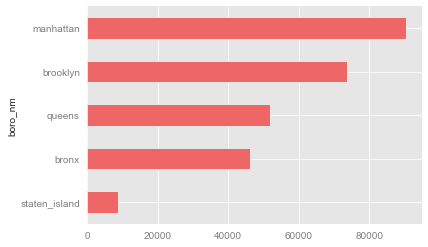

In [91]:
larceny.groupby('boro_nm').size().sort_values(ascending = False).head(10).sort_values().plot(kind= "barh")

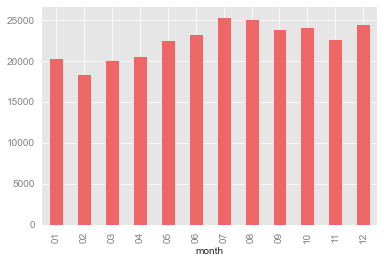

In [92]:
larceny.groupby("month").size().plot(kind = "bar")